In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install Pillow numpy matplotlib


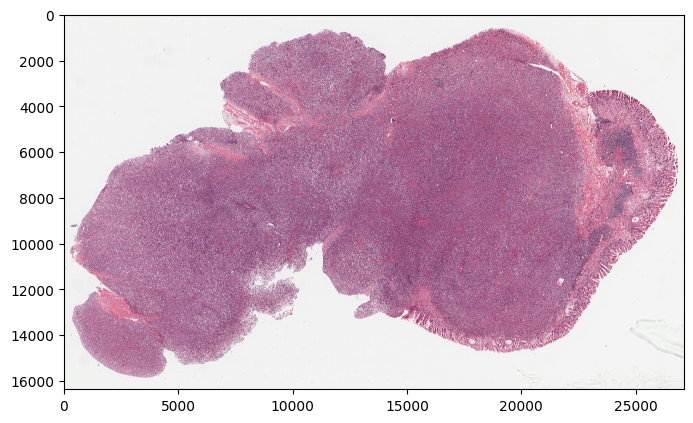

Streaming output truncated to the last 5000 lines.
Saving tile: /content/drive/MyDrive/Tiles/tile_40_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_41_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_42_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_43_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_44_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_45_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_46_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_47_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_48_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_49_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_50_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_51_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_52_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_53_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_54_15.png
Saving tile: /content/drive/MyDrive/Tiles/tile_55_15.png
Saving tile: /content/drive/MyDrive/T

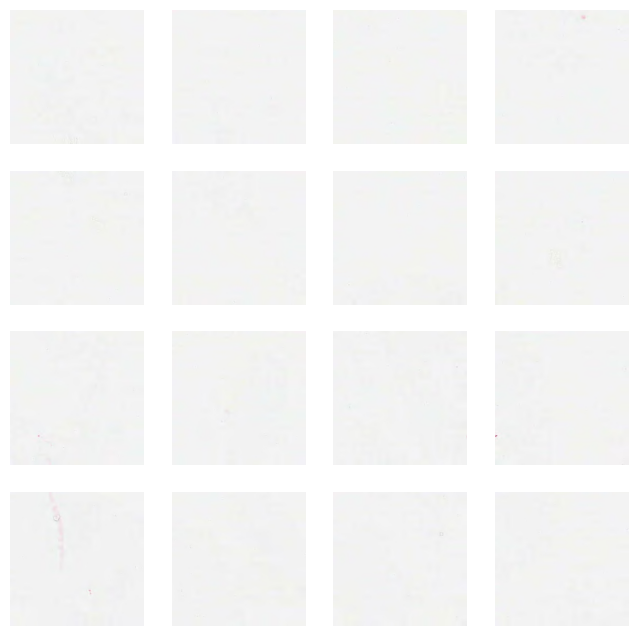

In [ ]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import os

# Path to your JPG or PNG file in Google Drive
image_file_path = '/content/drive/MyDrive/Org_1.jpg'

Image.MAX_IMAGE_PIXELS = None


# Load the image
image = Image.open(image_file_path)

# Convert image to numpy array and display
image_np = np.array(image)
plt.figure(figsize=(8, 8))
plt.imshow(image_np)
plt.show()

# Example of processing (e.g., getting dimensions)
image_dims = image.size
print("Image dimensions:", image_dims)

# Convert the image to RGB (if not already in RGB)
image_RGB = image.convert('RGB')

# Further processing (e.g., extracting tiles)
tile_size = 256
cols = image_RGB.width // tile_size
rows = image_RGB.height // tile_size

print("Number of columns:", cols)
print("Number of rows:", rows)

# Directory to save tiles
tile_dir = '/content/drive/MyDrive/Tiles'
os.makedirs(tile_dir, exist_ok=True)

# Extract and save tiles
for row in range(rows):
    for col in range(cols):
        left = col * tile_size
        upper = row * tile_size
        right = left + tile_size
        lower = upper + tile_size

        tile = image_RGB.crop((left, upper, right, lower))
        tile_name = os.path.join(tile_dir, f'tile_{col}_{row}.png')
        print(f"Saving tile: {tile_name}")
        tile.save(tile_name)

# Display some tiles as a sanity check
plt.figure(figsize=(8, 8))
for i in range(min(4, rows)):
    for j in range(min(4, cols)):
        plt.subplot(4, 4, i * 4 + j + 1)
        tile_path = os.path.join(tile_dir, f'tile_{j}_{i}.png')
        tile = Image.open(tile_path)
        plt.imshow(tile)
        plt.axis('off')
plt.show()


In [ ]:
cols = image_RGB.width // tile_size
rows = image_RGB.height // tile_size


In [ ]:
total_tiles = cols * rows
print("Total number of tiles:", total_tiles)


Total number of tiles: 6615


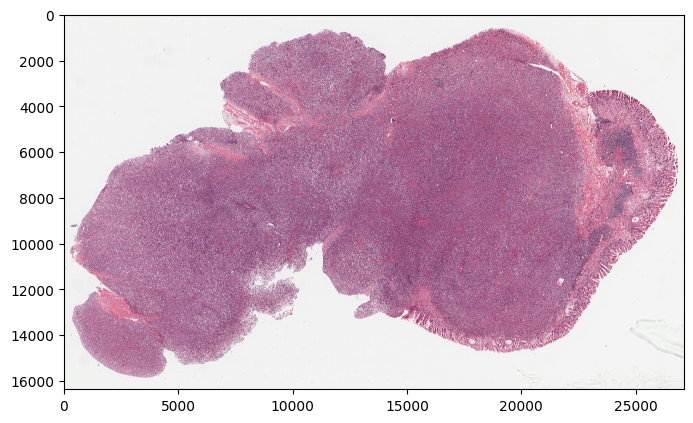

Image dimensions: (27098, 16362)
Saving tile: /content/drive/MyDrive/Abi_Test/Depuy/tile_2_3.png
Saving tile: /content/drive/MyDrive/Abi_Test/Depuy/tile_3_3.png
Saving tile: /content/drive/MyDrive/Abi_Test/Depuy/tile_4_3.png
Saving tile: /content/drive/MyDrive/Abi_Test/Depuy/tile_5_3.png
Saving tile: /content/drive/MyDrive/Abi_Test/Depuy/tile_2_4.png
Saving tile: /content/drive/MyDrive/Abi_Test/Depuy/tile_3_4.png
Saving tile: /content/drive/MyDrive/Abi_Test/Depuy/tile_4_4.png
Saving tile: /content/drive/MyDrive/Abi_Test/Depuy/tile_5_4.png


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Abi_Test/Depuy/tile_0_0.png'

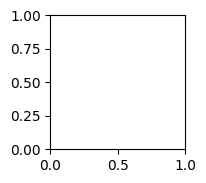

In [ ]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import os

# Increase the maximum image pixels limit
Image.MAX_IMAGE_PIXELS = None

# Path to your JPG or PNG file in Google Drive
image_file_path = '/content/drive/MyDrive/Org_1.jpg'

# Load the image
image = Image.open(image_file_path)

# Convert image to numpy array and display
image_np = np.array(image)
plt.figure(figsize=(8, 8))
plt.imshow(image_np)
plt.show()

# Example of processing (e.g., getting dimensions)
image_dims = image.size
print("Image dimensions:", image_dims)

# Convert the image to RGB (if not already in RGB)
image_RGB = image.convert('RGB')

# Manually determine the coordinates of the zoomed area
left_zoom = 700
top_zoom = 900
right_zoom = 1600  # Increase right_zoom to a larger value
bottom_zoom = 1300  # Increase bottom_zoom to a larger value

# Directory to save tiles
tile_dir = '/content/drive/MyDrive/Abi_Test/Depuy'
os.makedirs(tile_dir, exist_ok=True)

# Further processing (e.g., extracting tiles)
tile_size = 256

# Extract and save tiles only from the zoomed area
for row in range(top_zoom // tile_size, bottom_zoom // tile_size):
    for col in range(left_zoom // tile_size, right_zoom // tile_size):
        left = max(col * tile_size, left_zoom)
        upper = max(row * tile_size, top_zoom)
        right = min((col + 1) * tile_size, right_zoom)
        lower = min((row + 1) * tile_size, bottom_zoom)

        tile = image_RGB.crop((left, upper, right, lower))
        tile_name = os.path.join(tile_dir, f'tile_{col}_{row}.png')
        print(f"Saving tile: {tile_name}")
        tile.save(tile_name)

# Display some tiles as a sanity check
plt.figure(figsize=(8, 8))
for i in range(min(4, (bottom_zoom - top_zoom) // tile_size)):
    for j in range(min(4, (right_zoom - left_zoom) // tile_size)):
        plt.subplot(4, 4, i * 4 + j + 1)
        tile_path = os.path.join(tile_dir, f'tile_{j}_{i}.png')
        tile = Image.open(tile_path)
        plt.imshow(tile)
        plt.axis('off')
plt.show()



In [ ]:
FOR ONE IMAGE ZOOM

In [ ]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import o

# Increase the maximum image pixels limit
Image.MAX_IMAGE_PIXELS = None

# Path to your WSI image file
image_file_path = '/content/drive/MyDrive/Org_1.jpg'

# Load the WSI image
wsi_image = Image.open(image_file_path)

# Manually determine the coordinates of the zoomed area
left_zoom = 1000
top_zoom = 1500
right_zoom = 2000
bottom_zoom = 2500

# Extract the zoomed area
zoomed_area = wsi_image.crop((left_zoom, top_zoom, right_zoom, bottom_zoom))

# Directory to save the zoomed image
output_dir = '/content/drive/MyDrive/Abi_Test/Cofield'
os.makedirs(output_dir, exist_ok=True)

# Save the zoomed image
zoomed_area.save(os.path.join(output_dir, 'zoomed_area.jpg'))

print("Zoomed area image saved successfully!")


Zoomed area image saved successfully!


In [ ]:
mETHOD 2 ONE IMAGE ZOOM

In [ ]:
from PIL import Image
import os

# Increase the maximum image pixels limit
Image.MAX_IMAGE_PIXELS = None

# Path to your WSI image file
image_file_path = '/content/drive/MyDrive/Org_1.jpg'

# Load the WSI image
wsi_image = Image.open(image_file_path)

# Manually determined coordinates of the zoomed area
x = 12752
y = 6081
w = 77
h = 188

# Calculate the coordinates of the top-left and bottom-right corners
left_zoom = x
top_zoom = y
right_zoom = x + w
bottom_zoom = y + h

# Extract the zoomed area
zoomed_area = wsi_image.crop((left_zoom, top_zoom, right_zoom, bottom_zoom))

# Directory to save the zoomed image
output_dir = '/content/drive/MyDrive/Presentations_IOA'
os.makedirs(output_dir, exist_ok=True)

# Save the zoomed image
zoomed_area.save(os.path.join(output_dir, 'zoomed_area.jpg'))

print("Zoomed area image saved successfully!")


Zoomed area image saved successfully!


In [ ]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import os

# Increase the maximum image pixels limit
Image.MAX_IMAGE_PIXELS = None

# Path to your WSI image file
image_file_path = '/content/drive/MyDrive/Org_1.jpg'

# Load the WSI image
wsi_image = Image.open(image_file_path)

# Manually determined coordinates of the zoomed area
x = 12752
y = 6081
w = 77
h = 188

# Calculate the coordinates of the top-left and bottom-right corners
left_zoom = x
top_zoom = y
right_zoom = x + w
bottom_zoom = y + h

# Extract the zoomed area
zoomed_area = wsi_image.crop((left_zoom, top_zoom, right_zoom, bottom_zoom))

# Directory to save the zoomed image
output_dir = '/content/drive/MyDrive/Presentations_IOA'
os.makedirs(output_dir, exist_ok=True)

# Save the zoomed image
zoomed_area.save(os.path.join(output_dir, 'zoomed_area.jpg'))

print("Zoomed area image saved successfully!")


Zoomed area image saved successfully!
